In [1]:
from scipy.stats import norm
import math
import matplotlib.pyplot as plt

Suppose we have a normal distribution with standard deviation $\sigma=10$ and unknown variance. We will take a random sample of size $n=25$. 

Our null hypothesis $H_0$ is that $\mu=170$. And our alternative hypothesis $H_A$ is that $\mu>170$. 

Our hypothesis test is to reject the null if $\overline{X}\ge 172$. 

# Computing Type 1 and 2 Error, and Power

#### Question 1: 

What is the probability of committing a Type 1 Error?

#### Solution 1:


In [2]:
1 - norm.cdf(1)

0.15865525393145707

#### Question 2: 

If we knew that the mean is $\mu=173$, what is the probability of committing a Type II error? 

#### Solution 2:


We want to compute the probability our sample mean is less than 172 given $\mu = 173$. That is, $\Pr(\bar{X} < 172)$ if $\mu = 173$. 
$$\Pr\left(\frac{(\bar{X} - \mu)}{\sigma/\sqrt{n}} < \frac{172 - 173}{\sigma/\sqrt{n}}\right) = \Pr(Z < -0.5) = \Phi(-0.5) \approx 0.3085$$

In [3]:
norm.cdf(-0.5)

0.3085375387259869

#### Question 3: 

What is the probability of making a correct decision if $\mu=173$?

#### Solution 3:


This is $1 - \text{(type II error)}$. 

The power of a hypothesis test is the probability of making the correct decision if the alternative hypothesis $H_A$ is true. Since $\mu = 173$, the alternative is true. 

We want to compute $\Pr(\bar{X}\geq 172)$ if $\mu = 173$. We already computed $\Pr(\bar{X}< 172)$ when $\mu = 173$, so the answer is $1 - \Phi(-0.5)$. 

In [4]:
1 - norm.cdf(-0.5)

0.6914624612740131

# Computing Power Functions

In general, for any hypothesis test, there are two goals:


1.   Minimize the probability $\alpha$ of committing a Type 1 error. 
2.   Maximize the power $K(\mu)$, which is equivalent to minimizing the probability of committing a Type II error, $\beta(\mu)$. 



We generally want $\alpha$ to be $<0.1$ and $\beta < 0.2$ (so power $>0.8$). 

Suppose that $X$ is normally distributed with mean $\mu$, $\sigma = 16$, and suppose we take $n=16$ random samples. Set $\alpha = 0.05$. 




#### Question 4: 

Given that the hypotheses are $H_0:\mu=100$ and $H_A:\mu>100$, our hypothesis test is to reject the null hypothesis if $\overline{X}\ge c$. What is $c$ given $\alpha=0.05$?


#### Solution 4:

We run things in reverse, using inverse cdf. We set Type I error to be 0.05, $\Pr(\bar{X} > c) = 0.05$ when $\mu = 100$, so 
$$\Pr\left(\frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \geq \frac{c - \mu}{\sigma / \sqrt{n}}\right) = 0.05$$
in particular, $\Pr(Z \geq 0.25(c - 100)) = 1 - \Phi(0.25 c - 25) = 0.05$ so $c = 5\cdot \Phi^{-1}(0.95) + 100$. 

In [5]:
c = 4 * norm.ppf(0.95) + 100
c

106.5794145078059

#### Question 5: 

What is the power of the resulting hypothesis test if $\mu=108$? 

#### Solution 5:



This is, 
$$\Pr\left(\frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < \frac{c - 108}{\sigma / \sqrt{n}}\right)$$
which is 
$$\Pr(Z < -0.35515) = \Phi(-0.35515)$$
and the power is 
$$1 - \Phi(-0.35515)$$

In [6]:
1 - norm.cdf((c - 108) / (16 / math.sqrt(16)))

0.6387600313123348

What happens when we change the mean to $\mu = 112$? 

In [7]:
1 - norm.cdf((c - 112) / (16 / math.sqrt(16)))

0.9123145367502963

In [8]:
1 - norm.cdf((c - 116) / (16 / math.sqrt(16)))

0.9907422946265045

#### Question 6: 

Plot the power as a function of $\mu$.

#### Solution 6:

c : 106.5794145078059


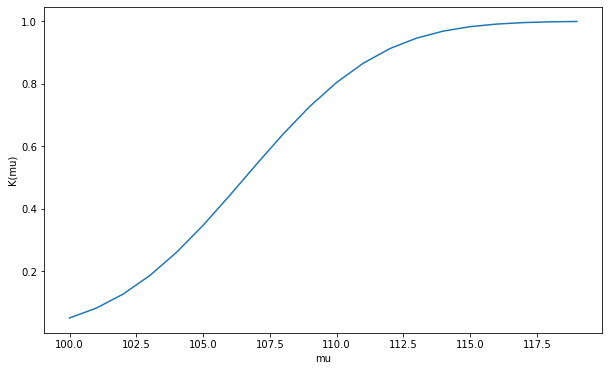

In [9]:
n = 16
sigma = 16
alpha = 0.05
null_mu = 100
# Alternate is > null_mu
c = (sigma / math.sqrt(n)) * norm.ppf(1 - alpha) + null_mu
print(f"c : {c}")
power = lambda actual_mu: 1 - norm.cdf((c - actual_mu) / (sigma / math.sqrt(n)))

probs_005 = [power(mu) for mu in range(100, 120)]

plt.figure(figsize=(10,6))
plt.plot(range(null_mu,null_mu + 20), probs_005)
plt.xlabel("mu")
plt.ylabel("K(mu)")

plt.show()

The distance above the curve is the probability of Type II error. 

The height of the curve at intercept is the Type I error.

#### Question 7: 

Change $\alpha$ to $0.01$, and recompute $c$. Then plot the new power function on the same graph. 

#### Solution 7:

c : 109.30539149616337


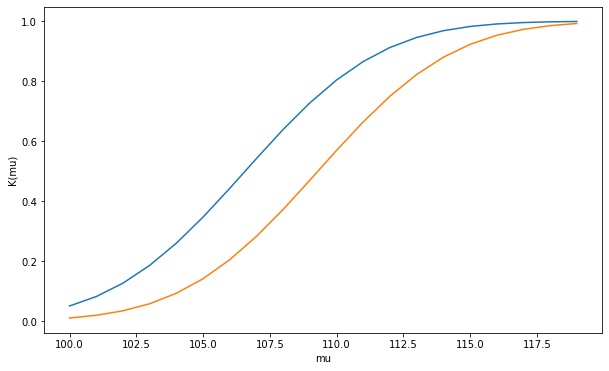

In [10]:
n = 16
sigma = 16
alpha = 0.01
null_mu = 100
# Alternate is > null_mu
c = (sigma / math.sqrt(n)) * norm.ppf(1 - alpha) + null_mu
print(f"c : {c}")
power = lambda actual_mu: 1 - norm.cdf((c - actual_mu) / (sigma / math.sqrt(n)))

probs_001 = [power(mu) for mu in range(100, 120)]

plt.figure(figsize=(10,6))
plt.plot(range(null_mu,null_mu + 20), probs_005)
plt.plot(range(null_mu,null_mu + 20), probs_001)
plt.xlabel("mu")
plt.ylabel("K(mu)")

plt.show()

Decreasing $\alpha$, $\beta$ went up. This is a tradeoff between Type I and Type II error. 

# Increasing the sample size to decrease $\alpha$ and $\beta$. 

In [14]:
# Question 8
n = 64
sigma = 16
alpha = 0.05
null_mu = 100
# Alternate is > null_mu
c = (sigma / math.sqrt(n)) * norm.ppf(1 - alpha) + null_mu
print(f"c : {c}")
power = lambda actual_mu: 1 - norm.cdf((c - actual_mu) / (sigma / math.sqrt(n)))
print(f"power 108 : {power(108)}")
print(f"power 112 : {power(112)}")
print(f"power 116 : {power(116)}")

c : 103.28970725390295
power 108 : 0.9907422946265045
power 112 : 0.9999933510984903
power 116 : 0.9999999998958858


c : 106.5794145078059
c : 103.28970725390295


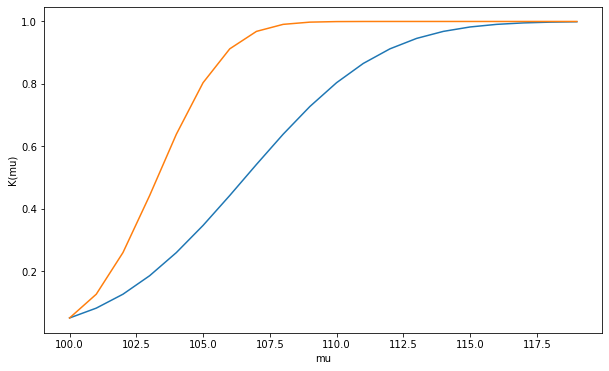

In [19]:
plt.figure(figsize=(10,6))

for n in [16, 64]:
    sigma = 16
    alpha = 0.05
    null_mu = 100
    # Alternate is > null_mu
    c = (sigma / math.sqrt(n)) * norm.ppf(1 - alpha) + null_mu
    print(f"c : {c}")
    power = lambda actual_mu: 1 - norm.cdf((c - actual_mu) / (sigma / math.sqrt(n)))
    probs = [power(mu) for mu in range(100, 120)]
    plt.plot(range(null_mu,null_mu + 20), probs)

plt.xlabel("mu")
plt.ylabel("K(mu)")
plt.show()

In [29]:
# Question 9
z_scores = norm.ppf(.95) - norm.ppf(.10)
target_std = (45 - 40) / z_scores
pop_std = 6
(pop_std / target_std) ** 2

12.331940184961882

In [27]:
40 + norm.ppf(.95) * target_std

42.81036548043522

**This is our statement:**

This makes my decision threshold 42.81. So if I were to take 13 samples and reject the null if the sample mean exceeds 42.737, I have a 5% chance of making a Type I error and a 10% chance of making a Type II error.

In [39]:
# Question 10
from sympy.solvers import solve
from sympy import Symbol
n = Symbol('n')
null_c = (0.5 + norm.ppf(0.99) * (0.5 / n ** (1/2)))
altern_c = (0.55 - norm.ppf(0.80) * (0.497 / n ** (1/2)))
solve(null_c - altern_c, n)

[1000.40590057227]

In [42]:
null_c

0.55 - 0.418285753085738/n**0.5

In [44]:
altern_c

0.55 - 0.418285753085738/n**0.5